In [1]:
import csv
#import pandas as pd
import datetime
#!pip install pyparsing
import pyparsing
#!pip install bibtexparser
import bibtexparser

import os
from os import path

#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fechas del reporte
date_inicio = datetime.datetime(2008,8,1)
date_fin = datetime.datetime(2021,12,31)

# direccion de la base de datos
database_folder = '../../database/'

## Read databases

In [3]:
## Papers
with open(database_folder + 'myproducts.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)
#print(bib_database.entries)


# Teaching
teaching = []
with open(database_folder + 'teaching.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        teaching.append(dictio)

 
# Talks
talks = []
with open(database_folder + 'talks.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        talks.append(dictio)
        
# Developments
developments = []
with open(database_folder + 'developments.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        developments.append(dictio)
        
        
# Divulgacion
divulgacion = []
with open(database_folder + 'divulgacion.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        divulgacion.append(dictio)
#print(divulgacion)

In [4]:
# Papers and thesis

count = 0
count_jcr = 0
count_cona = 0
count_proc = 0
count_mt = 0
count_preprint = 0
count_otros = 0
count_divul = 0

jcr_entries = []
proc_entries = []
mt_entries = []
cona_entries = []
preprint_entries = []
otros_entries = []
divul_entries = []

for entry in bib_database.entries:
    #print(entry)
    entry_date = datetime.datetime(int(entry['year']), int(entry['month']), 1)
    #if int(entry['year']) >= int(inicio['year']) and int(entry['year']) <= int(fin['year']):
    if date_inicio <= entry_date and entry_date <= date_fin:
        count = count +1
        #print(prod)
        
        if entry['ENTRYTYPE'] == 'article':
            if entry['note'] == 'jcr':
                jcr_entries.append(entry)
                count_jcr += 1
                
            elif entry['note'] == 'conacyt':
                cona_entries.append(entry)
                count_cona += 1
                
            elif entry['note'] == 'divulgacion':
                divul_entries.append(entry)
                count_divul += 1
                
            else:
                otros_entries.append(entry)
                count_otros += 1
            
        if entry['ENTRYTYPE'] == 'inproceedings':
            proc_entries.append(entry)
            count_proc += 1
            
        if entry['ENTRYTYPE'] == 'mastersthesis':
            mt_entries.append(entry)
            count_mt += 1
            
        if entry['ENTRYTYPE'] == 'unpublished':
            preprint_entries.append(entry)
            count_preprint += 1
        
print(f"{count} products found")
print(f"{count_jcr} JCR products found")
print(f"{count_proc} Proccedings products found")
print(f"{count_mt} Master Thesis found")
print(f"{count_cona} conacyt articles")
print(f"{count_cona} conacyt articles")
print(f"{count_preprint} preprints")
print(f"{count_divul} divulgacion")

31 products found
11 JCR products found
12 Proccedings products found
4 Master Thesis found
1 conacyt articles
1 conacyt articles
2 preprints
1 divulgacion


In [5]:
# Verificar que existe el folder
if not path.exists('html'):
    os.mkdir('html')

## Publicaciones

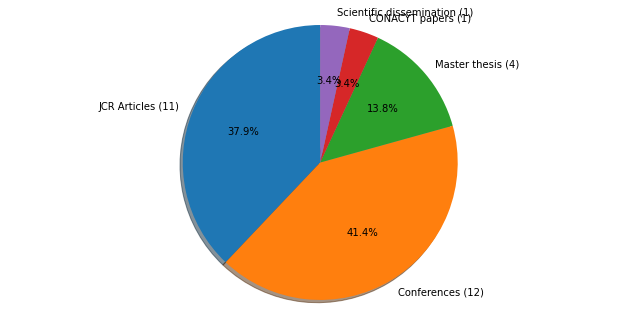

In [6]:
labels = []
publicaciones = []

# Graficar los productos
if count_jcr > 0:
    publicaciones.append(count_jcr)
    labels.append(f"JCR Articles ({str(count_jcr)})")
    
if count_proc > 0:
    publicaciones.append(count_proc)
    labels.append(f"Conferences ({str(count_proc)})")

if count_mt > 0:
    publicaciones.append(count_mt)
    labels.append(f"Master thesis ({str(count_mt)})")
    
if count_cona > 0:
    publicaciones.append(count_cona)
    labels.append(f"CONACYT papers ({str(count_cona)})")
    
#if count_preprint > 0:
#    publicaciones.append(count_preprint)
#    labels.append(f"Preprints ({str(count_preprint)})")

if count_divul > 0:
    publicaciones.append(count_divul)
    labels.append(f"Scientific dissemination ({str(count_divul)})")
    
#if count_otros > 0:
#publicaciones.append(count_otros)
#labels.append("Otros")

fig, ax1 = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

ax1.pie(publicaciones, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("html/products_en.pdf", format='pdf')
plt.savefig("html/products_en.png", format='png')
plt.show()

In [7]:
# Crear un archivo .tex para la producción científica
# Articulos JCR

# write data in a file. 
file1 = open("html/jcr_journals.html","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]  
  
file1.write("<h2><strong>Journal Papers<br /></strong></h2> \n")
    
# \n is placed to indicate EOL (End of Line) 
if count_jcr > 0:
    file1.write("<ul> \n") 
    
    jcr_entries = sorted(jcr_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in jcr_entries:
        file1.write(f"<li> {entry['author']}, <strong>{entry['title']}</strong>, <em> {entry['journal']}</em>, ({entry['year']}),") 
        if 'doi' in entry.keys():
            file1.write(f''' <a href="{entry['doi']}">{entry['doi']}</a>,''')
        file1.write(f" I.F. {entry['if']} </li> \n")
    file1.write("</ul> \n")                     
                                        
file1.close() #to change file access modes

In [8]:
# CONACYT

# write data in a file. 
file1 = open("html/conacyt_journals.html","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]    

file1.write("<h2><strong>CONACYT Journals<br /></strong></h2> \n")

if count_cona > 0:
    file1.write("<ul>\n") 
    
    cona_entries = sorted(cona_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in cona_entries:
        file1.write(f'''<li> {entry['author']}, <strong>{entry['title']}</strong>, <em>{entry['journal']}</em>, ({entry['year']}) </li> \n''') 
                    
    file1.write("</ul> \n")                  
                                        
file1.close() #to change file access modes 

In [9]:
# CONFERENCIAS

# write data in a file. 
file1 = open("html/proceedings.html","w") 
                                      
if count_proc > 0:
   #file1.write("\\begin{itemize} \n") 
   file1.write("<h2><strong>Conferences<br /></strong></h2> <ul>\n")
                    
   proc_entries = sorted(proc_entries, key = lambda i: i['year'], reverse = True)
                    
   for entry in proc_entries:
        file1.write(f'''<li> {entry['author']}, <strong>{entry['title']}</strong>, <em>{entry['booktitle']}</em>, {entry['year']} </li>\n''')        

   file1.write("</ul>\n")                     
                                        
file1.close() #to change file access modes 

In [12]:
# Preprints

# Crear un archivo .tex para los preprints
file1 = open("html/preprints.html","w")

if count_preprint > 0:
    # write data in a file.      

    file1.write("<h2>Preprints: </h2> <ul>\n")
    #file1.write("\\begin{itemize} \n") 
    
    for entry in preprint_entries:
        file1.write(f'''<li>{entry['author']}, <strong>{entry['title']}</strong>, {entry['journal']}, {entry['year']}, <a href="{entry['link']}">{entry['link']}</a> </li>\n''') 
                    
    file1.write("</ul> \n") 
                    
file1.close() #to change file access modes 

In [19]:
# MAESTRIA

# write data in a file. 
file1 = open("html/master_students.html","w")

#file1.write("\\item{\\bf GRADUATED MASTER STUDENTS: }\n")
    
if count_mt > 0:
    #file1.write("Tesis de maestría dirigidas: \n")
    file1.write("<h2>Master students thesis': </h2> <ul>\n")
    
    mt_entries = sorted(mt_entries, key = lambda i: i['year'], reverse = True)
                    
    for entry in mt_entries:
        file1.write(f''' <li>{entry['author']}, <a href="{entry['link']}">{entry['title']}</a>, {entry['year']}, {entry['school']}. </li>\n''')        

    file1.write("</ul> \n")
                    
file1.close() #to change file access modes 

In [20]:
filenames = ['html/encabezado.html','html/jcr_journals.html', 'html/conacyt_journals.html', 'html/proceedings.html', 'html/preprints.html', 'html/my_thesis.html', 'html/master_students.html']

with open('html/publications.html', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)